In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys
sys.path.append(os.path.dirname(os.path.abspath('')))
from data.datasets import Dataset

from models.linreg import LassoRegressionModel
from scripts.cross_validation import KFoldCrossValidation
import data.data_visu as viz

In [2]:
#Load data
project_root_dir = os.path.dirname(os.getcwd())
data_dirname = os.path.join(project_root_dir, 'challenge_data')

dataset = Dataset(dir_path=data_dirname)

In [3]:
# Default preprocessing for tests
dataset.quick_preprocessing()

In [4]:
# Model training
lr = LassoRegressionModel(alpha=0.001)
lr.fit(dataset.X_train, dataset.Y_train.TARGET)

(<Figure size 600x660 with 1 Axes>, <AxesSubplot: >)

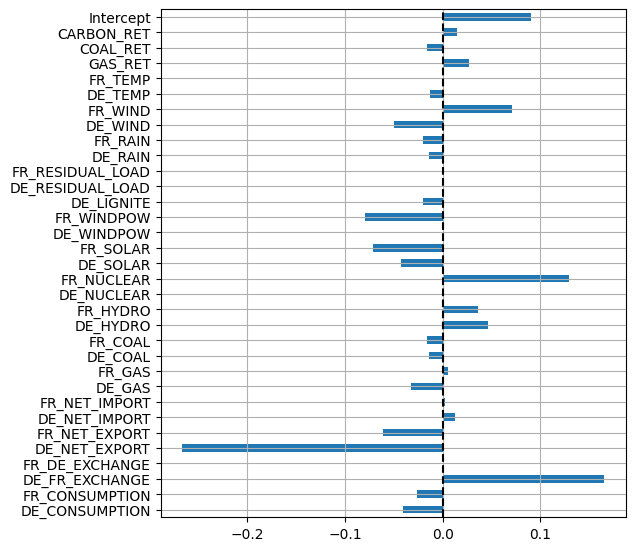

In [5]:
lr.plot_coef()

In [6]:
# Perform cross validation
CV = KFoldCrossValidation([lr], k = 5)
CV.run(dataset.X_train, dataset.Y_train.TARGET, verbose=False)

In [7]:
CV.scores

model,LassoReg
fold_id,
fold_0,0.287776
fold_1,0.175879
fold_2,0.205434
fold_3,0.217073
fold_4,0.151580


In [8]:
# Make a submission of tests data of dataset using model lr
y_test = lr.submit(dataset=dataset, 
          dir_name=data_dirname, 
          name="FastSub2")

c:\Users\ubar\Documents\MVA\information et complexité\ENS-Data-Challenge-Electricity-Prices-Forecast\models\model.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["TARGET"] = self.predict(X_test)


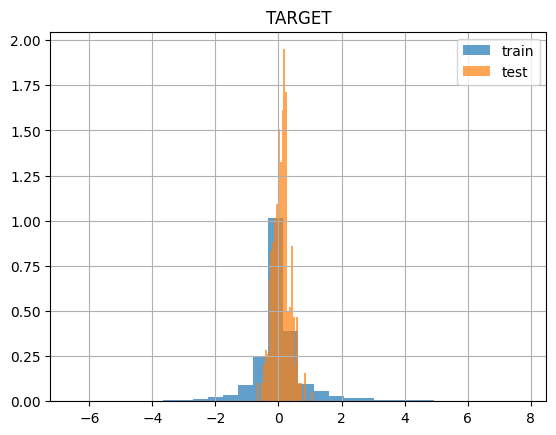

In [9]:
# Visualize target distribution
viz.show_target_distribution([dataset.Y_train, y_test],
                             ["train", "test"],
                             normalize=True)